In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

dim_entrada = (28, 28, 1)
dim_capa_oculta = 64


entrada = Input(shape=dim_entrada)
plano = Flatten()(entrada)
capa_oculta = Dense(dim_capa_oculta, activation='relu')(plano)
compresion = Dense(dim_capa_oculta, activation='relu')(capa_oculta)
plano_reconstruido = Dense(28*28, activation='sigmoid')(compresion)
salida = Reshape((28, 28, 1))(plano_reconstruido)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.3540 - val_loss: 0.1626
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1530 - val_loss: 0.1290
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1250 - val_loss: 0.1122
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1109 - val_loss: 0.1023
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1024 - val_loss: 0.0968
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0973 - val_loss: 0.0934
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0940 - val_loss: 0.0909
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0914 - val_loss: 0.0890
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0895 - val_loss: 0.0874
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0881 - val_loss: 0.0860
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


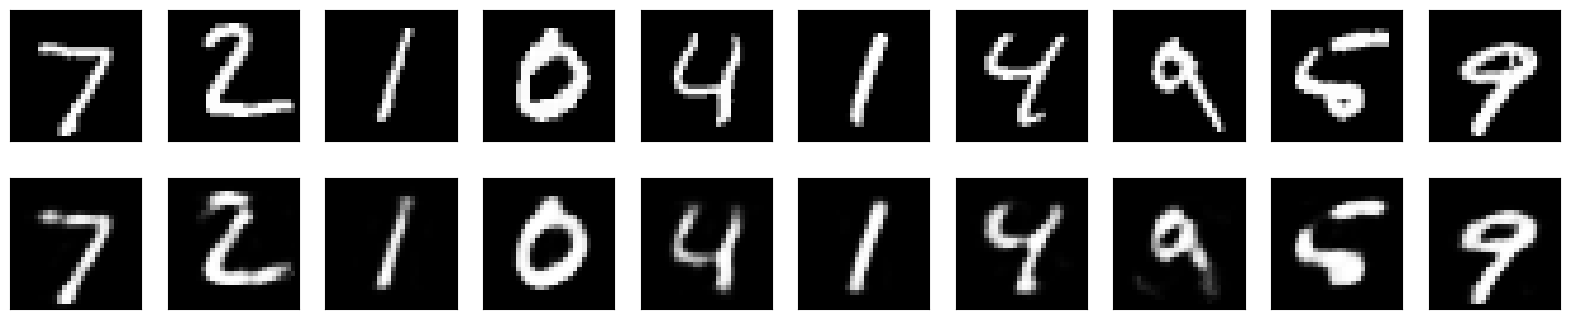

In [ ]:
autoencoder = Model(entrada, salida)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

imagenes_comprimidas = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imagenes_comprimidas[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
